In [63]:
import scipy.stats as sp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

## data type과 convolution mask

In [9]:
# 원본 그대로
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
# (1,1)=33임 -> zero padding은 아님, (-1,-1),(-1,1),(1,-1) 세 빈자리 합이 21
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[33 36 39]
 [42 45 48]
 [51 54 57]]


In [13]:
# (1,1)=5 -> (-1,-1)=5
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [1,0,0],
    [0,0,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[5 4 5]
 [2 1 2]
 [5 4 5]]


In [14]:
# (1,1)=4 -> (1,-1)=4
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,1,0],
    [0,0,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[4 5 6]
 [1 2 3]
 [4 5 6]]


In [15]:
# (1,1)=5 -> (1,-1)=5
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,1],
    [0,0,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[5 6 5]
 [2 3 2]
 [5 6 5]]


In [16]:
# (1,1)=2 -> (-1,1)=2
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [1,0,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[2 1 2]
 [5 4 5]
 [8 7 8]]


In [76]:
# (1,1)=5 -> (-1,2)=5
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [0,0,0],
    [1,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[5 4 5]
 [8 7 8]
 [5 4 5]]


padding 표현한 벡터 모습  
5 4 5 6 5  
2 1 2 3 2  
5 4 5 6 5  
8 7 8 9 8  
5 4 5 6 5  
<table>
    <tr> <td> 5 </td><td> 4 </td><td> 5 </td><td> 6 </td><td> 5 </td></tr>
    <tr> <td> 2 </td><td> 1 </td><td> 2 </td><td> 3 </td><td> 2 </td></tr>
    <tr> <td> 5 </td><td> 4 </td><td> 5 </td><td> 6 </td><td> 5 </td></tr>
    <tr> <td> 8 </td><td> 7 </td><td> 8 </td><td> 9 </td><td> 8 </td></tr>
    <tr> <td> 5 </td><td> 4 </td><td> 5 </td><td> 6 </td><td> 5 </td></tr>
</table>

In [34]:
# OpenCV의 padding
# (-1,-1) 값은 (2,2)에서 가져온 것
img = np.array([
    [1,2,3],
    [4,255,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [1,0,0],
    [0,0,0],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[255   4 255]
 [  2   1   2]
 [255   4 255]]


In [37]:
# convolution 계산 방법
img = np.array([
    [1,11,3],
    [4,13,6],
    [7,17,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [1,0,1],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[22  4 22]
 [26 10 26]
 [34 16 34]]


* uint8에는 -정수가 없는데

In [38]:
# 2nd column
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [-1,0,1],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[0 2 0]
 [0 2 0]
 [0 2 0]]


* 기본적으로 clipping 적용되어서 0 미만은 0
* 밝기 차이가 0?

In [39]:
# 2nd column
img = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [1,0,-1],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


* clipping 적용되어 255 초과는 255

In [40]:
# (2,2) column
img = np.array([
    [1,2,3],
    [200,5,200],
    [7,8,9],
], dtype="uint8")

kernel = np.array([
    [0,0,0],
    [1,0,1],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[  4   4   4]
 [ 10 255  10]
 [ 16  16  16]]


mask의 원소들의 합이 1이 넘으면 255보다 큰 값이 나올 수 있다는 것

* 형변환 mask는 float 이어야. not uint

In [81]:
# (2,2) column
img = np.array([
    [1,2,3],
    [200,5,200],
    [7,8,9],
], dtype="float")

kernel = np.array([
    [0,0,0],
    [1,0,-1],
    [0,0,0]
])

filtered = cv2.filter2D(img, -1, kernel)
print(filtered)

[[ 0. -2.  0.]
 [ 0.  0.  0.]
 [ 0. -2.  0.]]


* -2 를 uint8로 변환하니 254
-2를 2진수로 바꾸면.. 비트화  
2 = 00000010   
-2 = 11111110 = 254

In [82]:
#이미지 저장하려면 형변환해서 저장해야 해
cv2.imwrite("output.png", filtered.astype('uint8'))

img = cv2.imread("output.png")
print(img)

[[[  0   0   0]
  [254 254 254]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [254 254 254]
  [  0   0   0]]]


<img src=output.png width=30%>

두 방법 모두 명령어 있음  
응용에 따라 적용할 방법이 다름

* 음수를 최솟값으로
정규화 음수에도 적용시키려면  
(min,max)를 (0,255)로 scale 변환하기  
(t - min) / (max-min) * 255  
* 음수에 절댓값 씌워 크기만 가져오는 방법

numpy 이용한

In [53]:
#첫번째 방법
n = (  filtered - np.min(filtered)  )/(   np.max(filtered) - np.min(filtered)   )*255
print(n)
m = np.ptp(filtered)
print(m)


#두번째 방법
n2 = np.abs(filtered) / np.max(np.abs(filtered)) * 255
print(n2)


#함수 이용
#마스크 현상이라 None
#cv2.NORM_MINMAX : (t - min) / (max-min) * 255  공식을 이용
norm = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
print(norm)

norm2 = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
print(norm2)

[[255.   0. 255.]
 [255. 255. 255.]
 [255.   0. 255.]]
2.0
[[  0. 255.   0.]
 [  0.   0.   0.]
 [  0. 255.   0.]]
[[255   0 255]
 [255 255 255]
 [255   0 255]]


# 영역 처리를 이용한 에지 검출

In [72]:
# 모든 이미지 처리는 흑백에서 처리하는게 효과적이라
#항상 처리(계산)할 때에는 float 형태로.
src = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')  

#위아래 변화를 감지할 수 있는 엣지 필터. 엠보싱 필터.
kernel = np.array([
    [0,1,0],
    [0,0,0],
    [0,-1,0]
])
filtered0 = cv2.filter2D(src2, -1, kernel)
filtered = cv2.filter2D(src2, -1, kernel)+128

filtered2 = cv2.filter2D(src2, -1, kernel)
filtered2 = cv2.normalize(filtered2, None, 0, 255, cv2.NORM_MINMAX)

print(np.min(filtered))
print(np.max(filtered))

cv2.imwrite("output0.png", filtered0)
cv2.imwrite("output1.png", filtered)
cv2.imwrite("output2.png", filtered2)

#첫번째방법으로 했기때문에 엣지의 방향성을 볼 수 있음

5
290


True

* 정규화 안 함 : 음수엣지가 0 (검정색) | +128 | (0~255)로 정규화
<img src=output0.png width=30%>
<img src=output1.png width=30%>
<img src=output2.png width=30%>

### 수직 차이 계산 -> 수평엣지 검출
<img src=output3.png width=30%>

In [78]:
# 수평엣지 검출
src = cv2.imread("shape.png", cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')  

kernel = np.array([ 
    [0,1,0],           #수직 차이
    [0,0,0],
    [0,-1,0]
])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite("output3.png", filtered)

True

### 수평 차이 계산 -> 수직엣지 검출
<img src=output4.png width=30%>

In [80]:
# 수평엣지 검출
src = cv2.imread("shape.png", cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')  

kernel = np.array([ 
    [0,0,0],           #수직 차이
    [1,0,-1],
    [0,0,0]
])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite("output4.png", filtered)

True

In [83]:
# 원본 이미지에서 굵기를 더 굵게
src = cv2.imread("shape2.png", cv2.IMREAD_GRAYSCALE)
src2 = src.astype('int16')  

kernel = np.array([
    [0,1,0],
    [1,0,-1],
    [0,-1,0]
])
filtered = cv2.filter2D(src2, -1, kernel)

cv2.imwrite("output5.png", filtered)

True

### 가우시안 블러 후 엣지 추출

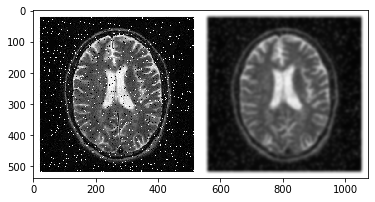

In [90]:
img = cv2.imread("brain.jpeg")
gauss = cv2.GaussianBlur(img, (25,25),0)  #행렬 크기 클수록 블러 많이

plt.imshow(np.hstack([img,gauss]))